<a href="https://colab.research.google.com/github/Marcusreu1/Tipos-de-algoritmos-ML-/blob/main/Algoritmos_supervisados/Modelo_KNN_clasificacion.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##EDA

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.neighbors import KNeighborsClassifier

In [2]:
!wget https://raw.githubusercontent.com/Marcusreu1/Tipos-de-algoritmos-ML-/main/salary%20dataset/creditos.csv

--2024-04-03 14:32:00--  https://raw.githubusercontent.com/Marcusreu1/Tipos-de-algoritmos-ML-/main/salary%20dataset/creditos.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2622 (2.6K) [text/plain]
Saving to: ‘creditos.csv’

creditos.csv        100%[===================>]   2.56K  --.-KB/s    in 0s      

2024-04-03 14:32:00 (36.2 MB/s) - ‘creditos.csv’ saved [2622/2622]



In [3]:
df=pd.read_csv("creditos.csv")

In [4]:
df.head()

,edad,credito,cumplio
0,18,363112,0
1,19,477965,1
2,20,239072,0
3,22,195265,0
4,22,482174,0


In [5]:
buenos= df[df['cumplio']==1]
malos=df[df['cumplio']==0]
buenos, malos

(     edad  credito  cumplio
 1      19   477965        1
 6      23   583565        1
 7      24   100000        1
 8      24   199272        1
 13     25   195341        1
 ..    ...      ...      ...
 187    51   354045        1
 188    51   379188        1
 189    51   396544        1
 190    52   100000        1
 192    53   130475        1
 
 [167 rows x 3 columns],
      edad  credito  cumplio
 0      18   363112        0
 2      20   239072        0
 3      22   195265        0
 4      22   482174        0
 5      23   468815        0
 9      24   246195        0
 10     24   433444        0
 11     25   100000        0
 12     25   161474        0
 40     28   432323        0
 53     29   590394        0
 54     29   595997        0
 56     30   157157        0
 64     31   173752        0
 78     32   588455        0
 93     35   521187        0
 97     36   568053        0
 98     37   299154        0
 113    40   100000        0
 118    40   459974        0
 135    43   498

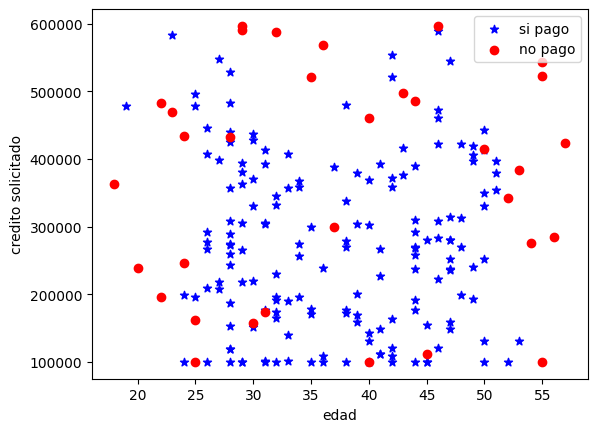

In [12]:
plt.scatter(buenos['edad'],buenos['credito'], color= 'blue', marker='*', label='si pago' )
plt.scatter(malos['edad'],malos['credito'], color='red',label='no pago')
plt.xlabel('edad')
plt.ylabel('credito solicitado')
plt.legend()
plt.show()

##preprocessing

###escalar

In [13]:
datos= df[['edad', 'credito']]
clase= df['cumplio']

escalador=preprocessing.MinMaxScaler()

datos=escalador.fit_transform(datos)

##crear modelo

In [22]:
clasificador= KNeighborsClassifier(n_neighbors=3)

clasificador.fit(datos, clase)

KNeighborsClassifier(n_neighbors=3)

clase [1]
probabilidad [[0.33333333 0.66666667]]


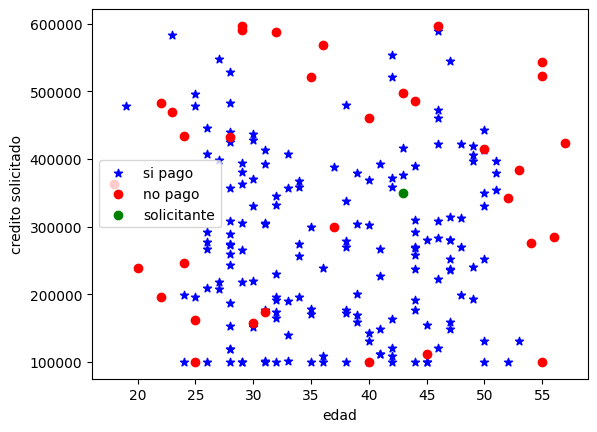

In [23]:
edad=43
credito=350000

solicitante= escalador.fit_transform([[edad, credito]])

print("clase", clasificador.predict(solicitante))
print("probabilidad", clasificador.predict_proba(solicitante))

plt.scatter(buenos['edad'],buenos['credito'], color= 'blue', marker='*', label='si pago' )
plt.scatter(malos['edad'],malos['credito'], color='red',label='no pago')
plt.scatter(edad,credito, color='green', label='solicitante')
plt.xlabel('edad')
plt.ylabel('credito solicitado')
plt.legend()
plt.show()